In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


df = pd.read_csv("titanic.csv")
df.head()

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_13924\3824044447.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Sex'] = np.where(df['Sex'] == "male", "M",
                     np.where(df['Sex'] == 'female', 'F','other'))

In [3]:
df["mr/mrs"] = np.where(df["Name"].str.contains("Mrs."),"Mrs",
                                np.where(df["Name"].str.contains("Ms."),"Ms",
                                        np.where(df['Name'].str.contains('Miss.'),'Ms',
                                                np.where(df['Name'].str.contains("Mr."),'Mr','Unknown'))))  

In [4]:
df['Name'] = df['Name'].str.replace("Mr.","")
df['Name'] = df['Name'].str.replace('Miss.',"")
df['Name'] = df['Name'].str.replace('Mrs.',"")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr/mrs
0,1,0,3,"Braund, Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",F,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Mr


In [5]:
Cabin_proc = df['Cabin']
df['Cabin'].fillna('Unknown', inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr/mrs
0,1,0,3,"Braund, Owen Harris",M,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",F,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Ms
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, William Henry",M,35.0,0,0,373450,8.0500,Unknown,S,Mr


<Axes: >

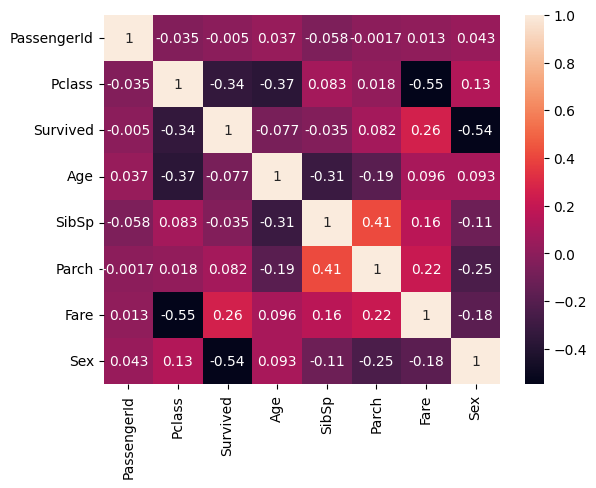

In [28]:
float_df = df[['PassengerId', 'Pclass','Survived', 'Age','SibSp', 'Parch', 'Fare','Sex']]
correlation = float_df.corr()
sns.heatmap(correlation, annot=True)

In [7]:
df = df.assign(age_bin=lambda x: df['Age'].apply(lambda x: '0-20' if x <= 20 else ('21-40' if x <= 40 else ('41-60' if x <= 60 else '61+'))))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr/mrs,age_bin
0,1,0,3,"Braund, Owen Harris",M,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,21-40
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",F,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,21-40
2,3,1,3,"Heikkinen, Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Ms,21-40
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Mrs,21-40
4,5,0,3,"Allen, William Henry",M,35.0,0,0,373450,8.0500,Unknown,S,Mr,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.0,0,0,211536,13.0000,Unknown,S,Unknown,21-40
887,888,1,1,"Graham, Margaret Edith",F,19.0,0,0,112053,30.0000,B42,S,Ms,0-20
888,889,0,3,"Johnston, Catherine Helen ""Carrie""",F,NaN,1,2,W./C. 6607,23.4500,Unknown,S,Ms,61+
889,890,1,1,"Behr, Karl Howell",M,26.0,0,0,111369,30.0000,C148,C,Mr,21-40


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
mr/mrs          object
age_bin         object
dtype: object

In [9]:
sex_value = {'M':1,'F':0}
df['Sex'] = df['Sex'].map(sex_value)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr/mrs,age_bin
0,1,0,3,"Braund, Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,21-40
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,21-40
2,3,1,3,"Heikkinen, Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Ms,21-40
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,21-40
4,5,0,3,"Allen, William Henry",1,35.0,0,0,373450,8.0500,Unknown,S,Mr,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Unknown,S,Unknown,21-40
887,888,1,1,"Graham, Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Ms,0-20
888,889,0,3,"Johnston, Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,Unknown,S,Ms,61+
889,890,1,1,"Behr, Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,21-40


In [12]:
embarked_value = {'C':2,'S':1,'Q':0}
df['Embarked'] = df['Embarked'].map(embarked_value)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr/mrs,age_bin
0,1,0,3,"Braund, Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,1.0,Mr,21-40
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,C85,2.0,Mrs,21-40
2,3,1,3,"Heikkinen, Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,1.0,Ms,21-40
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0,Mrs,21-40
4,5,0,3,"Allen, William Henry",1,35.0,0,0,373450,8.0500,Unknown,1.0,Mr,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Unknown,1.0,Unknown,21-40
887,888,1,1,"Graham, Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1.0,Ms,0-20
888,889,0,3,"Johnston, Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,Unknown,1.0,Ms,61+
889,890,1,1,"Behr, Karl Howell",1,26.0,0,0,111369,30.0000,C148,2.0,Mr,21-40


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


X = df[['Sex','Pclass']]
# I decided to choose sex and pclass becaus their correlation stood out the most and they were the cleanest in terms of null values.
print(X)




     Sex  Pclass
0      1       3
1      0       1
2      0       3
3      0       1
4      1       3
..   ...     ...
886    1       2
887    0       1
888    0       3
889    1       1
890    1       3

[891 rows x 2 columns]


In [30]:
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =45)



regression = LogisticRegression(random_state=45).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [31]:
y_predicted

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [32]:
regression.score(X_test, y_test)

0.8208955223880597